# Introduction

In this project, we will explored a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

The dataset that we will be using here is already clean.

In the dataset we have each row as a different major in college and contains information on gender diversity, employment rates, media salaries etc.

Below you can see some of the columns in the dataset and its description:

- __Rank__ - Rank by median earnings (the dataset is ordered by this column).
- __Major_code__ - Major code.
- __Major__ - Major description.
- __Major_category__ - Category of major.
- __Total__ - Total number of people with major.
- __Sample_size__ - Sample size (unweighted) of full-time.
- __Men__ - Male graduates.
- __Women__ - Female graduates.
- __ShareWomen__ - Women as share of total.
- __Employed__ - Number employed.
- __Median__ - Median salary of full-time, year-round workers.
- __Low_wage_jobs__ - Number in low-wage service jobs.
- __Full_time__ - Number employed 35 hours or more.
- __Part_time__ - Number employed less than 35 hours.

Using visualizations, we can explore questions like:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

Let's go!

In [1]:
#Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset
recent_grads = pd.read_csv("datasets/recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
#Explore some values from the data
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
#Informations about the dataset
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


You can see that we have 173 rows in total, but some columns have only 172, it means that we have one row with missing value. It needs to be extracted.

In [5]:
#Number of rows
raw_data_count = recent_grads.shape[0]

In [6]:
#Removing rows with missing values
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]

In [7]:
#Comparing number of rows
print("Now: ", cleaned_data_count)
print("Then: ", raw_data_count)

Now:  172
Then:  173


We have only one row removed from our original dataset. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors, so watch out.

# Pandas, Scatter Plots

Let's generate some plots to have a better view of our dataset.

Text(0, 0.5, 'Median')

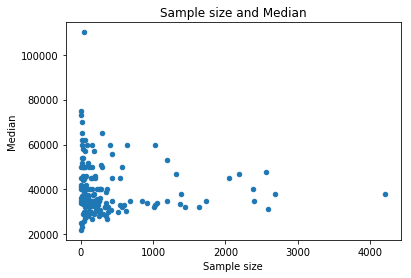

In [8]:
#Relation between Sample_size and Median
samp_and_median = recent_grads.plot(x="Sample_size", y="Median", kind="scatter",
                                   title="Sample size and Median")
samp_and_median.set_xlabel("Sample size")
samp_and_median.set_ylabel("Median")

Text(0, 0.5, 'Unemployment_rate')

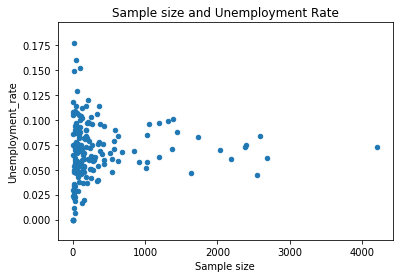

In [9]:
#Relation between Sample_size and Unemployment_rate
samp_and_unprate = recent_grads.plot(x="Sample_size", y="Unemployment_rate",
                                     title="Sample size and Unemployment Rate",
                                     kind="scatter")
samp_and_unprate.set_xlabel("Sample size")
samp_and_unprate.set_ylabel("Unemployment_rate")

Text(0, 0.5, 'Median')

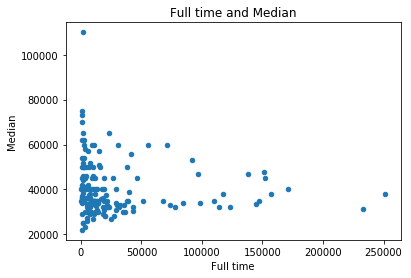

In [10]:
#Relation between Full_time and Median
fulltime_and_median = recent_grads.plot(x="Full_time", y="Median",
                                     title="Full time and Median",
                                     kind="scatter")
fulltime_and_median.set_xlabel("Full time")
fulltime_and_median.set_ylabel("Median")

Text(0, 0.5, 'Unemployment_rate')

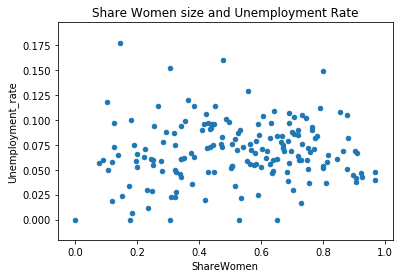

In [11]:
#Relation between ShareWomen and Unemployment_rate
sharewomen_and_unprate = recent_grads.plot(x="ShareWomen", y="Unemployment_rate",
                                     title="Share Women size and Unemployment Rate",
                                     kind="scatter")
sharewomen_and_unprate.set_xlabel("ShareWomen")
sharewomen_and_unprate.set_ylabel("Unemployment_rate")

Text(0, 0.5, 'Median')

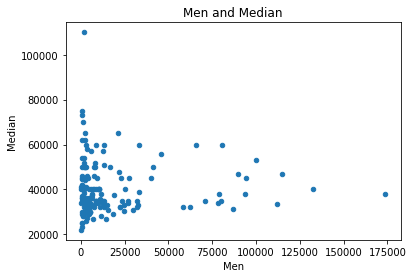

In [12]:
#Relation between Men and Median
men_and_median = recent_grads.plot(x="Men", y="Median",
                                     title="Men and Median",
                                     kind="scatter")
men_and_median.set_xlabel("Men")
men_and_median.set_ylabel("Median")

Text(0, 0.5, 'Median')

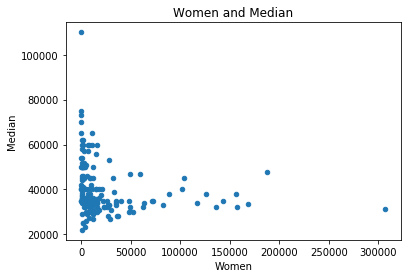

In [13]:
#Relation between Women and Median
women_and_median = recent_grads.plot(x="Women", y="Median",
                                     title="Women and Median",
                                     kind="scatter")
women_and_median.set_xlabel("Women")
women_and_median.set_ylabel("Median")

Text(0, 0.5, 'Median')

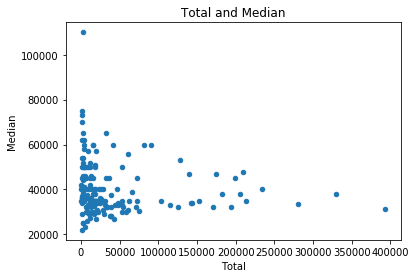

In [14]:
#Relation between Total and Median
total_and_median = recent_grads.plot(x="Total", y="Median",
                                     title="Total and Median",
                                     kind="scatter")
total_and_median.set_xlabel("Total")
total_and_median.set_ylabel("Median")

Do students in more popular majors make more money?
- Through the scatter plot (__Total and Median__) we can see that we have a vertical line close to Total = 0. There are not some many people with these majors. On the other hand, we can see that we have Total values equals to 200000, 400000 and with low median, that means that the a popula major is not an indication of a high salary.

Do students that majored in subjects that were majority female make more money?

- From the scatter plot (__Women and Median__) we can see the same thing that we concluded previously, there is a vertica line close to Total = 0. There are not some many people with these majors. We can see that the more women the lower the median salary will be.

Is there any link between the number o full-time employees and median salary?

- From the scatter plot (__Full_time and Median__) we can say that there is a link between full-time employees and media salary. You realize that the more employees the lower the media salary will be.

# Pandas, Histograms

Let's now generate some histograms to evaluate some colums.

We want to know what percent of majors are predominantly male and what percet are predominantly female. Let's see:

In [15]:
major_category = recent_grads["Major_category"].unique()

In [16]:
new_df = pd.DataFrame(columns=["Major_category", "Men", "Women"])

In [17]:
men = {}
women = {}

for row in major_category:
    selected_row_men = recent_grads.loc[recent_grads["Major_category"] == row, "Men"].astype(float).sum()
    selected_row_women = recent_grads.loc[recent_grads["Major_category"] == row, "Women"].astype(float).sum()

    men[row] = selected_row_men
    women[row] = selected_row_women

In [18]:
men_sorted = pd.Series(men).sort_values(ascending=False)
women_sorted = pd.Series(women).sort_values(ascending=False)

In [19]:
men_sorted

Business                               667852.0
Engineering                            408307.0
Humanities & Liberal Arts              272846.0
Social Science                         256834.0
Computers & Mathematics                208725.0
Biology & Life Science                 184919.0
Arts                                   134390.0
Communications & Journalism            131921.0
Industrial Arts & Consumer Services    103781.0
Education                              103526.0
Psychology & Social Work                98115.0
Physical Sciences                       95390.0
Law & Public Policy                     91129.0
Health                                  75517.0
Agriculture & Natural Resources         40357.0
Interdisciplinary                        2817.0
dtype: float64

In [20]:
women_sorted

Business                               634524.0
Education                              455603.0
Humanities & Liberal Arts              440622.0
Health                                 387713.0
Psychology & Social Work               382892.0
Social Science                         273132.0
Biology & Life Science                 268943.0
Communications & Journalism            260680.0
Arts                                   222740.0
Engineering                            129276.0
Industrial Arts & Consumer Services    126011.0
Computers & Mathematics                 90283.0
Physical Sciences                       90089.0
Law & Public Policy                     87978.0
Agriculture & Natural Resources         35263.0
Interdisciplinary                        9479.0
dtype: float64

In [21]:
new_df = pd.DataFrame(columns=["Major_category", "Men", "Women"])

In [22]:
new_df["Men"] = men_sorted

In [23]:
new_df["Women"] = women_sorted

In [24]:
new_df = new_df.drop("Major_category", axis=1)

In [25]:
print(new_df["Men"].min())
print(new_df["Women"].min())
print("-------------")
print(new_df["Men"].max())
print(new_df["Women"].max())

2817.0
9479.0
-------------
667852.0
634524.0


In [26]:
new_df

,Men,Women
Business,667852.0,634524.0
Engineering,408307.0,129276.0
Humanities & Liberal Arts,272846.0,440622.0
Social Science,256834.0,273132.0
Computers & Mathematics,208725.0,90283.0
Biology & Life Science,184919.0,268943.0
Arts,134390.0,222740.0
Communications & Journalism,131921.0,260680.0
Industrial Arts & Consumer Services,103781.0,126011.0
Education,103526.0,455603.0


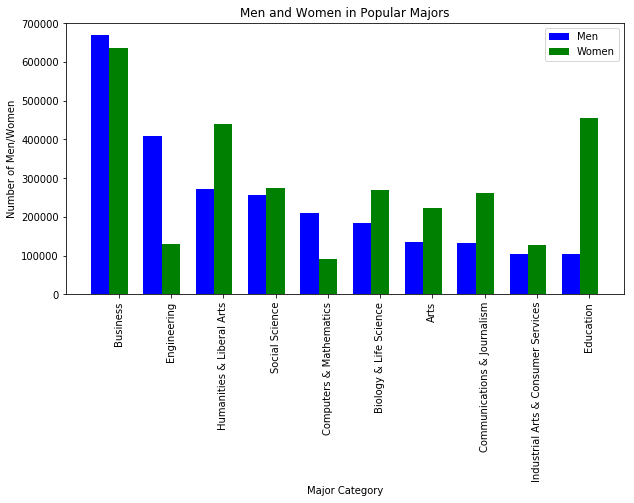

In [27]:
#Creating plot
import numpy as np

fig = plt.figure(figsize=(10,5))



major_category = ["Business","Engineering","Humanities & Liberal Arts","Social Science","Computers & Mathematics",
                  "Biology & Life Science","Arts","Communications & Journalism",
                  "Industrial Arts & Consumer Services","Education"]

bar_width = 0.35
cols = np.arange(len(major_category))

rects1 = plt.bar(cols, new_df["Men"][:10].values, bar_width, color="b", label="Men")
rects2 = plt.bar(cols + bar_width, new_df["Women"][:10].values, bar_width, color="g", label="Women")

plt.xlabel("Major Category")
plt.ylabel("Number of Men/Women")

plt.legend()
plt.title("Men and Women in Popular Majors")
plt.xticks(cols + bar_width, (major_category), rotation=90)
plt.show()

From the histogram above we can notice that we have some majors 
in which men are more prevalent, like Engineering, Computers & Mathematics and Business. We also have notice that majors like Biology  Life Science, Communications & Journalism and Education have women are predominantly students.

Let's take a loot at the Median salary range.

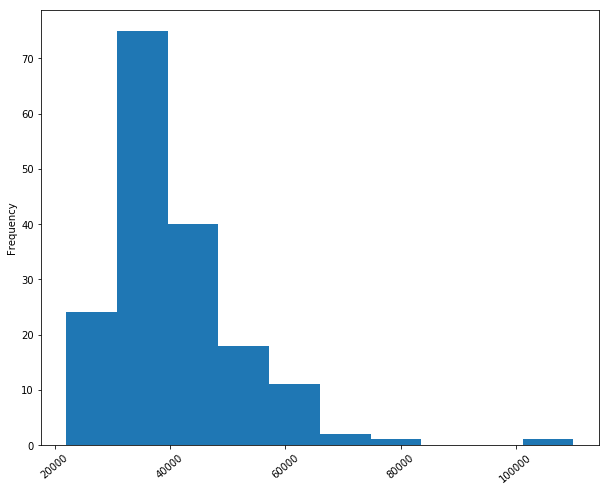

In [28]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
ax1 = recent_grads["Median"].plot(kind="hist", rot=40)

From the plot above we can see that we have a range salary between 30000 and 40000 with the most frequency. We have some outlier, the 110000 salary.

# Pandas, Scatter Matrix Plot

Let's use now a scatter matrix plot that allows us to combine both scatter plots and histograms into one grid of plot and therefore to explore potential relationships and distributions simultaneously.

In [29]:
#Importing the module
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa348489358>,
      dtype=object)

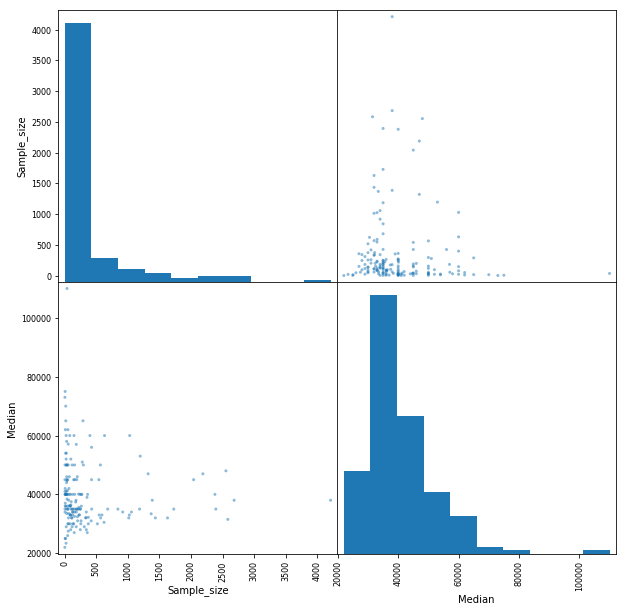

In [30]:
#Creating the scatter matrix
scatter_matrix(recent_grads[["Sample_size", "Median"]], figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3485931d0>,
      dtype=object)

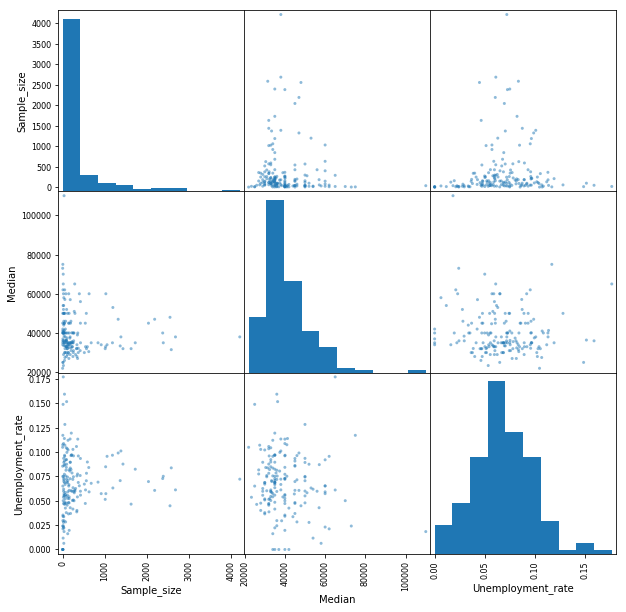

In [31]:
#Another one
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(10,10))

# Pandas, Bar Plots

Let's see a bar plot about our first 10 rows of our dataset and the last 10 rows.

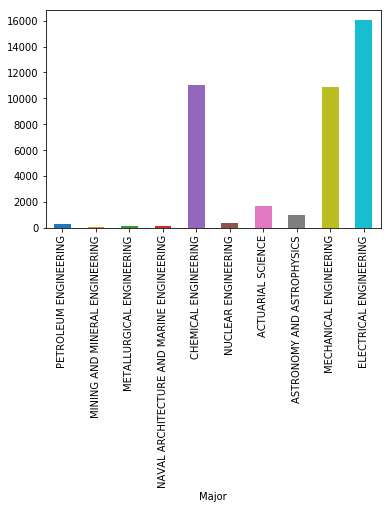

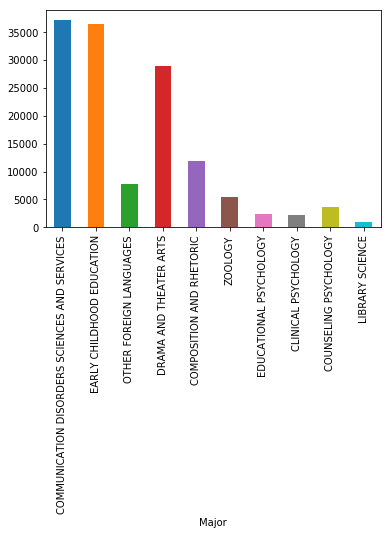

In [32]:
recent_grads[:10].plot.bar(x='Major', y='Women', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Women', legend=False)

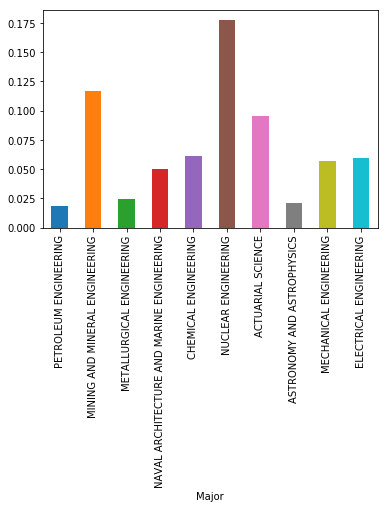

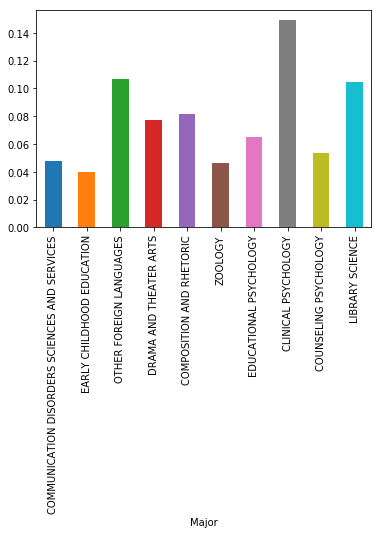

In [33]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)